In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###1. Consider the Cats & Dogs example. Start initially with a training sample of 1000, a validation sample of 500, and a test sample of 500 (like in the text). Use any technique to reduce overfitting and improve performance in developing a network that you train from scratch. What performance did you achieve.

In [4]:
import os, shutil
original_dataset_dir = '/content/drive/MyDrive/AML/Kaggle_original_data/train'

base_dir = '/content/drive/MyDrive/AML/cats_and_dogs_small'
#os.mkdir(base_dir)

### Directories for the training, validation, and test splits

train_dir = os.path.join(base_dir, 'train')
#os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
#os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
#os.mkdir(test_dir)

### Directory with training cat pictures

train_cats_dir = os.path.join(train_dir,'cats')
#os.mkdir(train_cats_dir)

### Directory with training dog pictures

train_dogs_dir = os.path.join(train_dir, 'dogs')
#os.mkdir(train_dogs_dir)

### Directory with val cat pictures

validation_cats_dir = os.path.join(validation_dir, 'cats')
#os.mkdir(validation_cats_dir)

### Directory with val dog pictures

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
#os.mkdir(validation_dogs_dir)

### Directory with test cat pictures

test_cats_dir = os.path.join(test_dir, 'cats')
#os.mkdir(test_cats_dir)

### Directory with val Dog pictures

test_dogs_dir = os.path.join(test_dir, 'dogs')
#os.mkdir(test_dogs_dir)

### Copies the first 1,000 cat images to train_cats_dir

fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(train_cats_dir, fname)
# shutil.copyfile(src, dst)

### Copies the next 500 cat images to validation_cats_dir

fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(validation_cats_dir, fname)
#  shutil.copyfile(src, dst)

### Copies the next 500 cat images to test_cats_dir

fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(test_cats_dir, fname)
#  shutil.copyfile(src, dst)


### Copies the first 1,000 dog images to train_dogs_dir

fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(train_dogs_dir, fname)
#  shutil.copyfile(src, dst)

### Copies the nxt 500 dog images to validation_dogs_dir

fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(validation_dogs_dir, fname)
#  shutil.copyfile(src, dst)

### Copies the nxt 500 dog images to test_dogs_dir

fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(test_dogs_dir, fname)
#  shutil.copyfile(src, dst)



let’s count how many pictures are in each training split 

In [ ]:
print('total training cat images:', len(os.listdir(train_cats_dir)))

print('total training dog images:', len(os.listdir(train_dogs_dir)))

print('total validation cat images:', len(os.listdir(validation_cats_dir)))

print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

print('total test cat images:', len(os.listdir(test_cats_dir)))

print('total test dog images:', len(os.listdir(test_dogs_dir)))


total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500



Defining a convnet for dogs vs. cats classification which includes dropout

In [ ]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

### Let’s look at how the dimensions of the feature maps change with every 
## successive layer:

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

Configuring the model for training

In [ ]:
from keras import optimizers
model.compile(loss='binary_crossentropy',
  optimizer=optimizers.RMSprop(learning_rate = 1e-4),
  metrics=['acc'])

#### Let’s train the network using data augmentation and dropout.

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
  rescale=1./255,
  rotation_range=40,
  width_shift_range=0.2,
  height_shift_range=0.2,
  shear_range=0.2,
  zoom_range=0.2,
  horizontal_flip=True,)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
  train_dir,
  target_size=(150, 150),
  batch_size=32,
  class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
  validation_dir,
  target_size=(150, 150),
  batch_size=32,
  class_mode='binary')

history = model.fit (
train_generator,
steps_per_epoch=62,
epochs=100,
validation_data=validation_generator,
validation_steps=31)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
62/62 [==============================] - 275s 4s/step - loss: 0.6893 - acc: 0.5224 - val_loss: 0.6775 - val_acc: 0.5410
Epoch 2/100
62/62 [==============================] - 23s 364ms/step - loss: 0.6781 - acc: 0.5655 - val_loss: 0.6592 - val_acc: 0.6160
Epoch 3/100
62/62 [==============================] - 23s 372ms/step - loss: 0.6676 - acc: 0.5838 - val_loss: 0.6669 - val_acc: 0.5530
Epoch 4/100
62/62 [==============================] - 23s 364ms/step - loss: 0.6573 - acc: 0.5879 - val_loss: 0.6270 - val_acc: 0.6470
Epoch 5/100
62/62 [==============================] - 22s 360ms/step - loss: 0.6428 - acc: 0.6209 - val_loss: 0.6109 - val_acc: 0.6730
Epoch 6/100
62/62 [==============================] - 23s 372ms/step - loss: 0.6400 - acc: 0.6321 - val_loss: 0.6004 - val_acc: 0.6680
Epoch 7/100
62/62 [==============================] - 23s 363ms/step - loss: 0.6270 - acc: 0.6479 - val_loss: 0.624

In [ ]:
model.save('cats_and_dogs_small_01.h5')

#### Plotting the Result

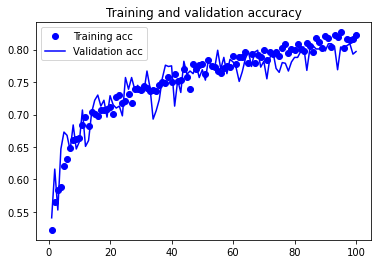

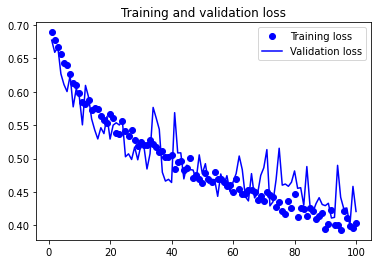

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()
# Training accuracy ~82
# Validation Accuracy ~80
# Training Loss ~0.39
# Validation Loss ~0.40


###4. Repeat Steps 1-3, but now using a pretrained network. The sample sizes you use in Steps 2 and 3 for the pretrained network may be the same or different from those using the network where you trained from scratch. Again, use any and all optimization techniques to get best performance

####Using pretrained convnet(VGG16)

In [5]:
from keras.applications import VGG16
conv_base = VGG16(weights='imagenet',
include_top=False,
input_shape=(150, 150, 3))

conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

####Extracting features using the pretrained convolutional base


In [8]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
base_dir = '/content/drive/MyDrive/AML/cats_and_dogs_small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20
def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
      directory,
      target_size=(150, 150),
      batch_size=batch_size,
      class_mode='binary')
    i=0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

train_features = np.reshape(train_features, (2000, 4*4* 512))
validation_features = np.reshape(validation_features, (1000, 4*4* 512))
test_features = np.reshape(test_features, (1000, 4*4* 512))

Found 2000 images belonging to 2 classes.
1/1 [==============================] - 6s 6s/step
Found 1000 images belonging to 2 classes.
1/1 [==============================] - 5s 5s/step
Found 1000 images belonging to 2 classes.
1/1 [==============================] - 5s 5s/step


#### Defining and training the densely connected classifier

In [9]:
from keras import models
from keras import layers
from keras import optimizers
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5),
loss='binary_crossentropy',
metrics=['acc'])
history = model.fit(train_features, train_labels,
epochs=30,
batch_size=20,
validation_data=(validation_features, validation_labels))


/usr/local/lib/python3.9/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/30
100/100 [==============================] - 3s 27ms/step - loss: 0.6176 - acc: 0.6500 - val_loss: 0.4589 - val_acc: 0.8320
Epoch 2/30
100/100 [==============================] - 3s 29ms/step - loss: 0.4391 - acc: 0.8055 - val_loss: 0.3735 - val_acc: 0.8670
Epoch 3/30
100/100 [==============================] - 4s 36ms/step - loss: 0.3593 - acc: 0.8455 - val_loss: 0.3346 - val_acc: 0.8710
Epoch 4/30
100/100 [==============================] - 3s 26ms/step - loss: 0.3160 - acc: 0.8765 - val_loss: 0.3031 - val_acc: 0.8900
Epoch 5/30
100/100 [==============================] - 2s 24ms/step - loss: 0.2869 - acc: 0.8895 - val_loss: 0.2883 - val_acc: 0.8900
Epoch 6/30
100/100 [==============================] - 3s 26ms/step - loss: 0.2710 - acc: 0.8975 - val_loss: 0.2897 - val_acc: 0.8800
Epoch 7/30
100/100 [==============================] - 3s 31ms/step - loss: 0.2448 - acc: 0.9065 - val_loss: 0.2681 - val_acc: 0.8970
Epoch 8/30
100/100 [==============================] - 4s 36ms/step - 

In [11]:
model.save('cats_and_dogs_small_01_pretrained.h5')

 #### Plotting the results

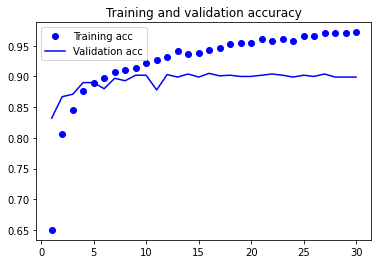

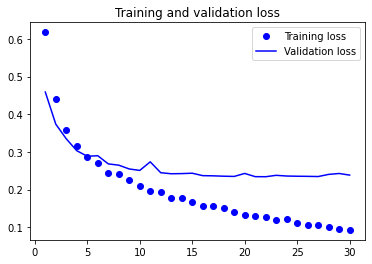

In [10]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()
# validation accuracy ~90
# Training accuracy  ~97
# Training Loss ~0.09
# Validation Loss ~0.23
